#  Linear Regression

### Importing libraries

In [11]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
import sklearn.metrics as metrics

### Uploading data

In [2]:
url = "https://raw.githubusercontent.com/Agablue-red/Machine-Learning/master/data/data_rate.csv"
data = pd.read_csv(url)

In [3]:
data.head()

,symbol,score,Date,log_rate
0,A,0.572765,2008-07-02,-0.063982
1,A,0.576979,2008-07-16,0.016846
2,A,0.579936,2008-07-30,0.019815
3,A,0.569940,2008-08-13,-0.019493
4,A,0.550504,2016-07-13,0.042472


### Information about dataset

Data types:

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29996 entries, 0 to 29995
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   symbol    29996 non-null  object 
 1   score     29996 non-null  float64
 2   Date      29996 non-null  object 
 3   log_rate  29996 non-null  float64
dtypes: float64(2), object(2)
memory usage: 937.5+ KB


Changing the type of 'date' variable:

In [39]:
data["Date"] = pd.to_datetime(data["Date"])
data = data.set_index('Date')
data.sort_index(inplace=True)

In [40]:
data.head()

,symbol,score,log_rate
Date,,,
2004-02-11,FCFS,0.686924,0.049570
2004-02-11,RCI,0.757159,0.003422
2004-02-11,ESE,0.747727,0.005126
2004-02-11,NL,0.709419,0.017833
2004-02-11,KSWS,0.826617,-0.020834


#### Fundamental statistics on numeric variables

In [8]:
data.describe()

,score,log_rate
count,29996.000000,29996.000000
mean,0.731574,0.006215
std,0.117569,0.055155
min,0.413554,-0.527210
25%,0.654207,-0.020007
50%,0.741993,0.007245
75%,0.813804,0.033962
max,0.987225,0.916291


There are in total 29 996 observations. The mean score for this dataset is 0,73 and mean return rate is 0,006.

In [9]:
data.symbol.value_counts()

SHW     170
GEF     140
ORLY    138
INGR    122
GPC     122
       ... 
BMI       1
BOOT      1
POST      1
ULH       1
HLX       1
Name: symbol, Length: 1319, dtype: int64

There are 1319 companies in total, some of them occur only once in the time series and some even over 100 times. 

### Splitting the data into training and test sets

Training set involves data from 2010 to 2020 and test set includes the year 2021.


In [63]:
X_train = data['2010':'2020'].drop(['symbol','log_rate'], axis = 1)
y_train = data.loc['2010':'2020', 'log_rate']

X_test = data['2021':'2022'].drop(['symbol','log_rate'], axis = 1)
y_test = data.loc['2021':'2022', 'log_rate']

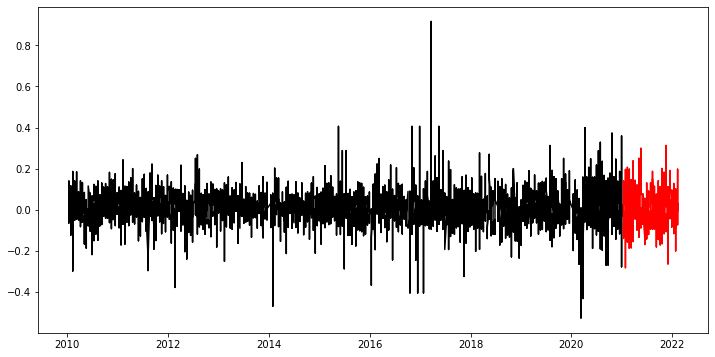

In [64]:
fig, ax=plt.subplots(figsize=(12, 6))

plt.plot(y_train, color = "black")
plt.plot(y_test, color = "red")

In [65]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (19328, 1)
Number transactions y_train dataset:  (19328,)
Number transactions X_test dataset:  (2260, 1)
Number transactions y_test dataset:  (2260,)


### Dummy regression

In [66]:
from sklearn.dummy import DummyRegressor

In [67]:
# train model
reg_dummy = DummyRegressor(strategy = 'mean').fit(X_train, y_train) 

print('Coefficient of determination:', reg_dummy.score(X_train, y_train))

Coefficient of determination: 0.0


0% indicates thet the model does not fit the training data.

In [68]:
# predict & evaluate
y_pred_dum = reg_dummy.predict(X_test)

print("Coefficient of determination (R2): %.5f" % r2_score(y_test , y_pred_dum) )
print("Mean absolute error (MAE): %.5f" % np.mean(np.absolute(y_pred_dum - y_test)))
print("Residual sum of squares (MSE): %.5f" % mean_squared_error(y_test, y_pred_dum))
print("Root mean squared error (RMSE): %.5f" % np.sqrt(metrics.mean_squared_error(y_test, y_pred_dum)))

Coefficient of determination (R2): -0.00022
Mean absolute error (MAE): 0.04444
Residual sum of squares (MSE): 0.00349
Root mean squared error (RMSE): 0.05905


### Linear regression

In [69]:
from sklearn import metrics

# train model
lm = LinearRegression().fit(X_train, y_train)

print('Coefficient of determination:', lm.score(X_train, y_train))
print('Intercept:', lm.intercept_)
print('Slope:', lm.coef_)

Coefficient of determination: 0.00040496151184277185
Intercept: 0.013150793836373038
Slope: [-0.00907272]


f(x) = b₁x + b₀

f(x) = -0.009x + 0.013

𝑅² = 0.0004

0.0004% indicates thet the model does not fit the training data.

**Measure of fit a model**

In [70]:
# predict & evaluate
y_pred = lm.predict(X_test)

print('predicted response:', y_pred, sep='\n')

print("Coefficient of determination (R2): %.5f" % r2_score(y_test , y_pred) )
print("Mean absolute error (MAE): %.5f" % np.mean(np.absolute(y_pred - y_test)))
print("Residual sum of squares (MSE): %.5f" % mean_squared_error(y_test, y_pred))
print("Root mean squared error (RMSE): %.5f" % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

predicted response:
[0.00565683 0.0075637  0.0068274  ... 0.00566467 0.00608964 0.00454928]
Coefficient of determination (R2): -0.00050
Mean absolute error (MAE): 0.04445
Residual sum of squares (MSE): 0.00349
Root mean squared error (RMSE): 0.05906


Adjusted R squared  is adjusted for the number of independent variables in the model and equal -0.00050 (adjusted  R² will always be less than or equal to R²).

The average of the residuals equal 0.04445.

The variance of the residuals equal 0.00349.

The standard deviation of residuals equal 0.05906.

### Comparison between dummy regression and linear regression combinaed with observations from the test set.

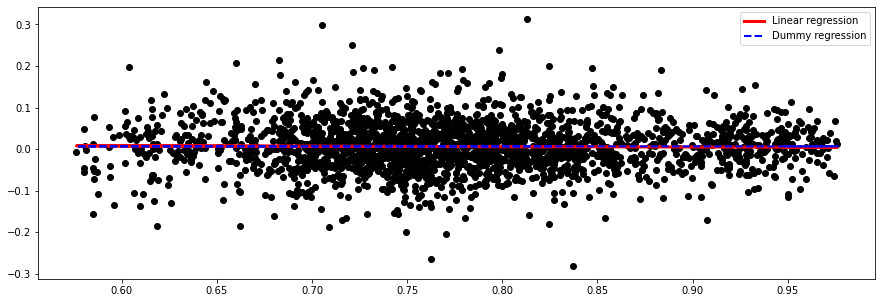

In [71]:
fig, ax=plt.subplots(figsize=(15, 5))

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='red', linewidth=3, label='Linear regression')
plt.plot(X_test, y_pred_dum, color='blue', linestyle = 'dashed', linewidth=2, label = 'Dummy regression')
ax.legend()

Model does not explain any of the variation in the response variable around its mean.

Linear regression is marginally better than dummy regression.

Both models do not fit the variables.